In [1]:
import numpy as np
import pandas as pd

from datetime import datetime as dt

import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')

In [2]:
data = pd.read_csv('../data/Film_Permits 2018_present.csv', parse_dates=['StartDateTime', 'EndDateTime'])

In [18]:
data = data[data['EndDateTime'] <= '2021-01-04']
data

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [4]:
print( data['StartDateTime'].min(), data['StartDateTime'].max() )

2018-01-03 03:00:00 2020-12-31 00:00:00


In [5]:
def range_to_list(a, b):
    return pd.date_range(a, b, freq = 'H')[:-1]

In [6]:
data['StartEnd'] = [[i, j] for i, j in zip( data['StartDateTime'], data['EndDateTime'])]
data['TimeList'] = data['StartEnd'].apply(lambda x: range_to_list(x[0], x[1]))

In [7]:
data['TimeList'].to_list()

[DatetimeIndex(['2020-12-31 00:00:00', '2020-12-31 01:00:00',
                '2020-12-31 02:00:00', '2020-12-31 03:00:00',
                '2020-12-31 04:00:00', '2020-12-31 05:00:00',
                '2020-12-31 06:00:00', '2020-12-31 07:00:00',
                '2020-12-31 08:00:00', '2020-12-31 09:00:00',
                '2020-12-31 10:00:00', '2020-12-31 11:00:00',
                '2020-12-31 12:00:00', '2020-12-31 13:00:00',
                '2020-12-31 14:00:00', '2020-12-31 15:00:00',
                '2020-12-31 16:00:00', '2020-12-31 17:00:00',
                '2020-12-31 18:00:00', '2020-12-31 19:00:00',
                '2020-12-31 20:00:00', '2020-12-31 21:00:00',
                '2020-12-31 22:00:00', '2020-12-31 23:00:00',
                '2021-01-01 00:00:00', '2021-01-01 01:00:00',
                '2021-01-01 02:00:00', '2021-01-01 03:00:00'],
               dtype='datetime64[ns]', freq='H'),
 DatetimeIndex(['2020-12-29 20:00:00', '2020-12-29 21:00:00',
                '20

In [8]:
data

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,StartEnd,TimeList
229,555851,Shooting Permit,2020-12-31 00:00:00,2021-01-01 04:00:00,12/21/2020 3:04:47 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 47 STREET between BROADWAY and 7 AVENUE,Manhattan,5,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2020-12-31 00:00:00, 2021-01-01 04:00:00]","DatetimeIndex(['2020-12-31 00:00:00', '2020-12..."
230,556112,Shooting Permit,2020-12-29 20:00:00,2020-12-30 04:00:00,12/27/2020 9:48:33 PM,"Mayor's Office of Film, Theatre & Broadcasting",7 AVENUE between WEST 41 STREET and WEST 4...,Bronx,"10, 5, 2009","10, 13, 14, 43, 45",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2020-12-29 20:00:00, 2020-12-30 04:00:00]","DatetimeIndex(['2020-12-29 20:00:00', '2020-12..."
242,555360,Shooting Permit,2020-12-23 08:00:00,2020-12-25 03:00:00,12/15/2020 1:49:34 PM,"Mayor's Office of Film, Theatre & Broadcasting",MADISON AVENUE between EAST 50 STREET and EA...,Manhattan,5,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2020-12-23 08:00:00, 2020-12-25 03:00:00]","DatetimeIndex(['2020-12-23 08:00:00', '2020-12..."
243,555937,Shooting Permit,2020-12-23 07:00:00,2020-12-23 21:00:00,12/22/2020 1:35:23 PM,"Mayor's Office of Film, Theatre & Broadcasting",DECATUR STREET between WYCKOFF AVENUE and IRVI...,Queens,"4, 5","104, 83",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2020-12-23 07:00:00, 2020-12-23 21:00:00]","DatetimeIndex(['2020-12-23 07:00:00', '2020-12..."
244,555707,Shooting Permit,2020-12-23 06:00:00,2020-12-23 23:00:00,12/18/2020 8:41:34 PM,"Mayor's Office of Film, Theatre & Broadcasting",MOULTRIE STREET between NORMAN AVENUE and MESE...,Brooklyn,1,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2020-12-23 06:00:00, 2020-12-23 23:00:00]","DatetimeIndex(['2020-12-23 06:00:00', '2020-12..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20159,391005,Shooting Permit,2018-01-04 07:00:00,2018-01-04 23:00:00,01/03/2018 11:21:59 AM,"Mayor's Office of Film, Theatre & Broadcasting","DEGRAW STREET between 3 AVENUE and DEAD END, ...",Brooklyn,6,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2018-01-04 07:00:00, 2018-01-04 23:00:00]","DatetimeIndex(['2018-01-04 07:00:00', '2018-01..."
20160,390906,Shooting Permit,2018-01-04 06:30:00,2018-01-04 21:00:00,01/02/2018 2:50:09 PM,"Mayor's Office of Film, Theatre & Broadcasting",COVERT STREET between WYCKOFF AVENUE and IRVIN...,Queens,"4, 5","104, 83",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2018-01-04 06:30:00, 2018-01-04 21:00:00]","DatetimeIndex(['2018-01-04 06:30:00', '2018-01..."
20161,390784,Shooting Permit,2018-01-04 06:00:00,2018-01-04 20:00:00,01/02/2018 7:41:45 AM,"Mayor's Office of Film, Theatre & Broadcasting",BROADWAY between GRAND STREET and HOWARD STREE...,Manhattan,2,"1, 5",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2018-01-04 06:00:00, 2018-01-04 20:00:00]","DatetimeIndex(['2018-01-04 06:00:00', '2018-01..."
20162,391010,Shooting Permit,2018-01-04 06:00:00,2018-01-04 22:00:00,01/03/2018 11:31:29 AM,"Mayor's Office of Film, Theatre & Broadcasting","35 STREET between 34 AVENUE and 35 AVENUE, 35...",Queens,1,114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2018-01-04 06:00:00, 2018-01-04 22:00:00]","DatetimeIndex(['2018-01-04 06:00:00', '2018-01..."


In [9]:
data['hours'] = data['TimeList'].apply(lambda x: list(x.hour))
data['day'] = data['TimeList'].apply(lambda x: list(set(x.date)))

In [10]:
import itertools
flat_hour = list(itertools.chain(*data['hours']))
flat_hour = pd.DataFrame(flat_hour)
flat_hour_new = flat_hour.rename(columns={0:"hour"})
flat_hour_new = flat_hour_new.reset_index()
flat_hour_count = flat_hour_new.groupby('hour').count()
flat_hour_count = flat_hour_count.rename(columns= {'index':"count"})
flat_hour_count = flat_hour_count.reset_index()
flat_hour_count

,hour,count
0,0,10072
1,1,9472
2,2,8886
3,3,8451
4,4,8289
5,5,7471
6,6,12890
7,7,17715
8,8,19444
9,9,20519


In [11]:
flat_day = list(itertools.chain(*data['day']))
flat_day = pd.DataFrame(flat_day)
flat_day = flat_day.rename(columns={0:"date"})
flat_day = flat_day.reset_index()
flat_day_count = flat_day.groupby('date').count()
flat_day_count = flat_day_count.rename(columns= {'index':"count"})
flat_day_count = flat_day_count.reset_index()
# flat_day_count

In [15]:
flat_day_count

,date,count
0,2018-01-03,1
1,2018-01-04,5
2,2018-01-05,3
3,2018-01-06,1
4,2018-01-07,2
...,...,...
1090,2020-12-28,1
1091,2020-12-29,2
1092,2020-12-30,2
1093,2020-12-31,1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

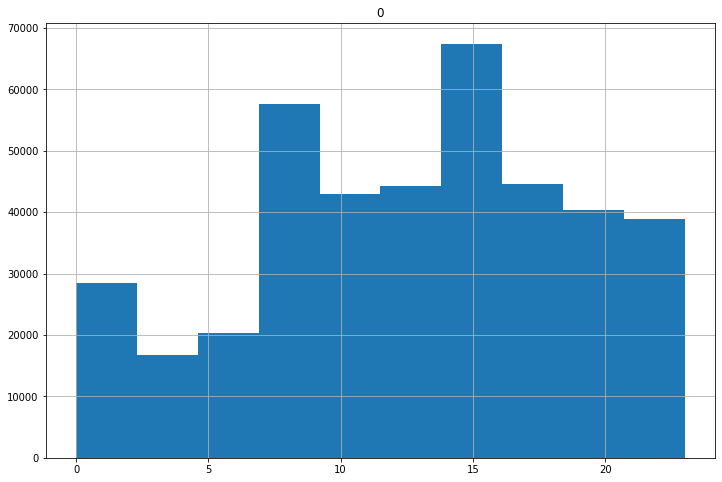

In [13]:
flat_hour.hist(figsize=(12,8))

In [14]:
# Day_2018 = flat_day_count
# Hour_2018 = flat_hour_count
# Day_2018.to_csv('../output/day_2018.csv')
# Hour_2018.to_csv('../output/hour_2018.csv')